In [1]:
%matplotlib inline
from __future__ import division
import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os
import multiprocessing

matplotlib.style.use('ggplot')

comp_name=socket.gethostname()
if  comp_name == 'Ezequiels-MacBook-Pro.local':
    print 'Computer: ' + comp_name
    sys.path.append('/Users/zeke/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/Users','zeke','experiment')
else:
    print 'Computer: ' + 'server'
    sys.path.append('/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/','experiment')
    
import unitToolsv2
from data_handling import ephys_names as en
from data_handling.basic_plot import decim, plot_raster, make_psth, col_binned
from data_handling import data_load as dl
from data_handling.data_load import get_warping_parameters
from analysis import stimulus as st
from analysis import response_functions as rf


#load all the records, to not load all the records for every stimulus
fn = en.file_names(root = experiment_folder)
cells_path = os.path.join(fn.fold_exp_data, 'data_play')
uf = dl.list_cells(cells_path)
all_cells = [f for f in uf if f.find('ZKawakeM72_029')>-1]
all_cells = uf
#print all_cells
all_records = dl.load_cells(cells_path, all_cells)

#all_records = dl.load_cells(cells_path)

## create a stimulus and initialize it (load its responses)
high_2hydroxy = st.Odor(['2-hydroxyacetophenone','2hydroxyacetophenone'], 0.0051)
st_1 = st.Stimulus(high_2hydroxy, records = all_records, tags = {'light':1} )

#get the first response and plot it
warp = True
#st_1.responses['ZKawakeM72_013_e_010'].get_response_onset(warped=warp)
#rp = st_1.responses['ZKawakeM72_013_e_010'].plot(warped=warp)

#make all the odor stimuli
tags = {'light':1}
# {odor_name: [stim_aliases], conc, records, tags, extra_plot_pars}

all_odors_list = {'2-hydroxy_high': [['2-hydroxyacetophenone','2hydroxyacetophenone'], 0.0051, 
                  all_records, tags, {'color': '#9F000F', 'alpha': 1.}],
                  
                  '2-hydroxy_med': [['2-hydroxyacetophenone','2hydroxyacetophenone'], 2.97e-4,
                                    all_records, tags, {'color': '#F62217', 'alpha': .5}],
                  
                  '2-hydroxy_low': [['2-hydroxyacetophenone','2hydroxyacetophenone'], 1.8e-5,
                                    all_records, tags, {'color': '#E77471', 'alpha': .25}],
                  
                  'ethyl_tiglate': [['ethyl_tiglate','ethyltiglate'], 1.3e-4,
                                    all_records, tags, {'color': '#41a317', 'alpha': 1.}],
                  
                  'acetophenone': [['acetophenone','acetoph'], 7.9e-4, 
                                   all_records, tags, {'color': '#43c6db', 'alpha': 1.}],
                  
                  '4-methyl': [['4-methylacetophenone','4methyl'], 1.8e-3,
                               all_records, tags, {'color': '#FF00FF', 'alpha': 1.}],
                  
                  'benzaldehyde': [['benzaldehyde', 'benz'], 1.9e-4,
                                   all_records, tags, {'color': '#F88017', 'alpha': 1.}],
                  
                  '2-4-dimethyl': [['2-4-dimethylacetophenone', '24-dimethylacetophenone'], 5.8e-3, 
                                   all_records, tags, {'color': '#FFD801', 'alpha': 1.}],
                  
                  'menthone_high': [['menthone', 'mentone'], 1.6e-2,
                                    all_records,tags, {'color': '#000080', 'alpha': 1.}],
                  
                  'menthone_med': [['menthone', 'mentone'], 1.6e-3,
                                   all_records, tags, {'color': '#1569c7', 'alpha': 0.5}],
                  
                  'menthone_low': [['menthone', 'mentone'], 7e-5,
                                   all_records, tags, {'color': '#188AC7', 'alpha': .25}]
                 }

all_odors = {}
for key, sd in all_odors_list.iteritems():
    all_odors.update({key: st.Stimulus(st.Odor(sd[0], sd[1]), records=sd[2], tags=sd[3], extra_plot_pars=sd[4])})

all_odors_population = {}
for key, sd in all_odors_list.iteritems():
    all_odors_population.update({key: st.Stimulus(st.Odor(sd[0], sd[1]), records=sd[2], tags = {'light':0}, extra_plot_pars=sd[4])})

all_odor_responses = {'litral': all_odors, 'population': all_odors_population}

print all_odors.keys()
#[r.plot(warped=True) for r in list(st_1.responses.values())]
stim = all_odor_responses['litral']['2-hydroxy_high']
cell_responses = stim.cell_responses


Computer: server
Computer: server
/experiment/export_data/data_play/ZKawakeM72_011_001_cell.mat
/experiment/export_data/data_play/ZKawakeM72_011_003_cell.mat
/experiment/export_data/data_play/ZKawakeM72_011_004_cell.mat
/experiment/export_data/data_play/ZKawakeM72_011_005_cell.mat
/experiment/export_data/data_play/ZKawakeM72_011_006_cell.mat
/experiment/export_data/data_play/ZKawakeM72_011_007_cell.mat
/experiment/export_data/data_play/ZKawakeM72_011_010_cell.mat
/experiment/export_data/data_play/ZKawakeM72_011_011_cell.mat
/experiment/export_data/data_play/ZKawakeM72_011_012_cell.mat
['ethyl_tiglate', '4-methyl', 'menthone_med', 'menthone_high', 'acetophenone', '2-4-dimethyl', 'menthone_low', '2-hydroxy_med', '2-hydroxy_high', '2-hydroxy_low', 'benzaldehyde']


{'ax_stack': <matplotlib.figure.AxesStack at 0x7f73f3c97d90>,
 'fig': None,
 'figure': <matplotlib.figure.Figure at 0x7f73f3e1ba50>}

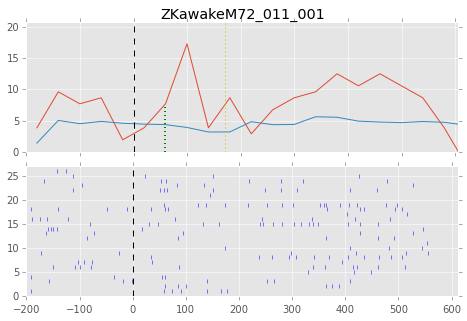

In [8]:
sim = all_odor_responses['population']['2-hydroxy_high']
r = stim.cell_responses['ZKawakeM72_011_001']
warp = True
r.get_response_onset(warped=warp, p_ks=0.05, bin_size=30)
r.plot(warped=warp, bin_size=40)

In [9]:
r.responses[0].rec['meta']['light']

1

In [26]:
sim = all_odor_responses['litral']
rast3, base3 = stim.cell_responses['ZKawakeM72_011_001'].make_raster(warped=True)
plot_raster(rast3)
plot_raster(rast3, bin_size=10)
plot_raster(base3)
plot_raster(base3, bin_size=10)

ValueError: could not broadcast input array from shape (442) into shape (443)

(266.5, 543.0)
(266.5, 543.0)


{'ax_stack': <matplotlib.figure.AxesStack at 0x7f347b2d8a50>,
 'fig': None,
 'figure': <matplotlib.figure.Figure at 0x7f347e7d7650>}

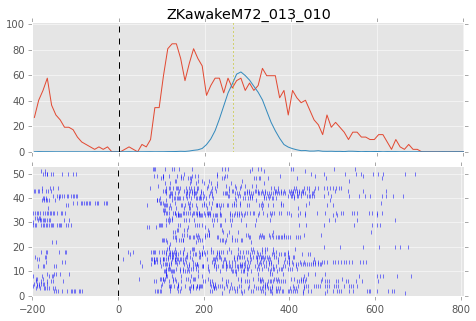

In [5]:
stim = all_odor_responses['litral']['2-hydroxy_high']
cell_responses = stim.cell_responses
cell_responses['ZKawakeM72_013_010'].plot(warped=True)


In [18]:
cr

NameError: name 'cr' is not defined

{'ax_stack': <matplotlib.figure.AxesStack at 0x7f4e12febb10>,
 'fig': None,
 'figure': <matplotlib.figure.Figure at 0x7f4e30415590>}

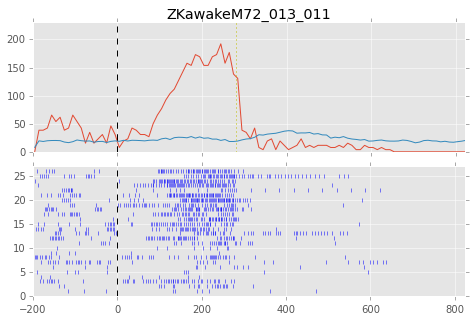

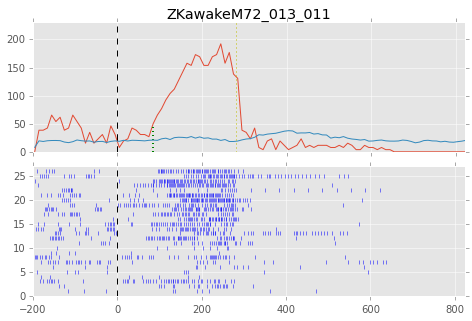

In [2]:
rf
cr = cell_responses['ZKawakeM72_013_011']
rs, bl= cr.make_raster(t_pre=200, warped=True)
cr.get_response_onset(warped=True)
cr.plot(t_pre=200, warped=True)

In [4]:
sniff_stat = cr.get_sniff_parameters()
print rf.is_good_sniff(None, sniff_stat)
print rs.shape
dir(cr)
print cr.get_spike_count()

0
(281.0, 543.5)
(26, 1024)
(87.016863834352392, -30.821830262603008)


In [5]:
mat_file_path='/Users/zeke/experiment/export_data/ZKawakeM72_013_e_011_spikes.mat'
assert(os.path.isfile(mat_file_path))
print (mat_file_path)
spike_data = sio.loadmat(mat_file_path, struct_as_record=False, squeeze_me=True)
spikes_loaded = spike_data['thisUnit']
all_spikes = np.array(spikes_loaded.times, dtype=np.float)

/Users/zeke/experiment/export_data/ZKawakeM72_013_e_011_spikes.mat


In [4]:
# initialize ipython "cluster" first.
# this connects client to the cluster workers.

from IPython.parallel import Client
C = Client(profile='default')
lbv = C.load_balanced_view()

In [47]:
# I'm defining the draw_and_mean as a nested function here because

def parfunc(stimulus_sa, baseline_sa):
    """
    stimulus_sa: numpy array of shape (n_bins, n_trials)
    
    """
    import numpy as np
    from scipy.stats import ks_2samp
    
    def draw_and_mean(spike_array, n_bs, n_trials):
        # draw= np.empty_like(bl_sa)
        draw_indexes = np.random.randint(0, spike_array.shape[1]-1, (n_bs, n_trials))
        psths = np.empty((n_bs, spike_array.shape[0]))
        for i in xrange(n_bs):
            draw_is = draw_indexes[i]
            draw = spike_array[:, draw_is]
            psths[i, :] = draw.mean(axis=1)
        return psths
    
    """
    spike arrays are each numpy.array of shape (n_bins, n_trials) (for baseline it's actually n_sniffs instead of trials)
    spike arrays here are normalized (Hz).
    """
    assert(stimulus_sa.shape[0]==baseline_sa.shape[0])
    
    response_mean = stimulus_sa.mean(axis=1)
    ntr = stimulus_sa.shape[1] # number of trials in stimulus.
    baseline_boot = draw_and_mean(baseline_sa, 100000, ntr)

    ps = np.empty_like(response_mean)
    ks = np.empty_like(response_mean)
    kst = np.empty_like(response_mean)
    for j in xrange(len(response_mean)):
        r = response_mean[j]
        base = baseline_boot[:, j]
    #     print base.shape
        p = np.sum(base >= r)/len(base)
        ps[j] = p
        kst[j], ks[j] = ks_2samp(stimulus_sa[j,:],baseline_sa[j,:])
    ps = np.asarray(ps)
    

    
    return ps, baseline_boot, ks, kst

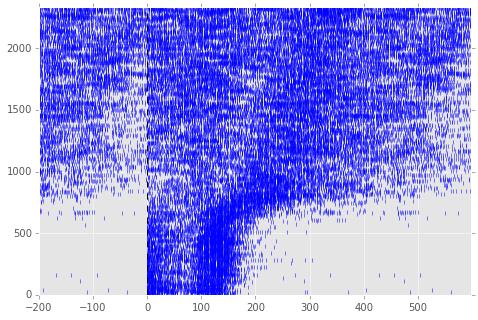

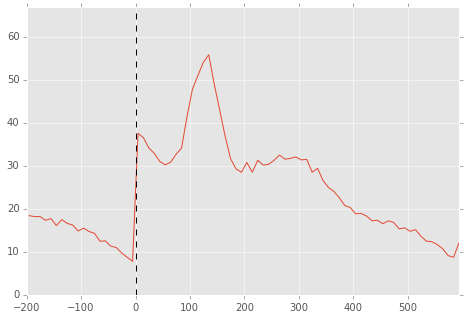

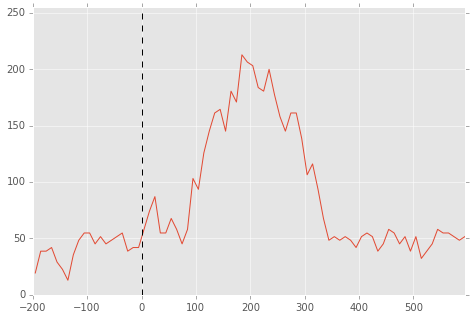

In [43]:
rec_name = 'ZKawakeM72_013_e_011'
r0=st_1.responses[rec_name]
rst = r0.make_raster(warped=False)
#plot_raster(rst, t0=200)
#plot_raster(rst, bin_size=10, t0=200)
bl=r0.baseline.make_raster(t_pre=200, t_post=800, warped=False)
plot_raster(bl, t0=200)
plot_raster(bl, t0=200, bin_size=10)
plot_raster(rst, t0=200, bin_size=10)
bin_size = 10
events   = bl.shape[0]
t_stamps = bl.shape[1]
t=np.arange(t_stamps)-200
t_dec = decim(t, bin_size)



In [10]:
bin_size = 10
rst_sa = col_binned(rst, bin_size).transpose()
bl_sa = col_binned(bl,bin_size).transpose()
ps, psths, ks, kst = parfunc(rst_sa, bl_sa)
response_mean = rst.transpose().mean(axis=1)
import itertools
plt.plot(rst_sa.mean(axis=1))
plt.plot(psths[800//bin_size, :])
#plt.plot(psths.mean(axis=0))
plt.plot(ks)
#find first ks<p
p=0.01
seq = ks<p
onset = next(i for i in range(len(ks)) if ks[i]<p)
print onset*bin_size-200

NameError: name 'rst' is not defined

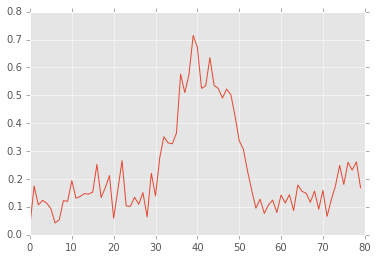

In [50]:
plt.plot(kst)

370


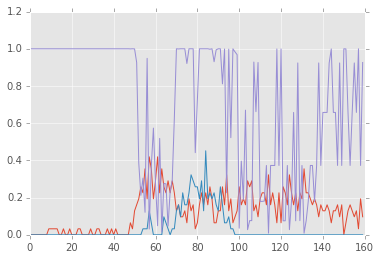

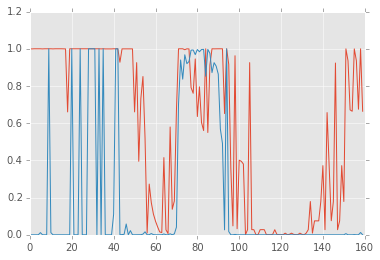

In [8]:
plt.plot(ks)
plt.plot(ps)

In [39]:
print min(ps[0:26])
print min(ks[0:26])

0.0
0.660645191248


In [40]:
print min(ps[20:60])
print min(ks[20:60])

0.0
0.00958797048124


(<matplotlib.collections.PathCollection at 0x117324750>,
 <matplotlib.axes._axes.Axes at 0x1172eed90>)

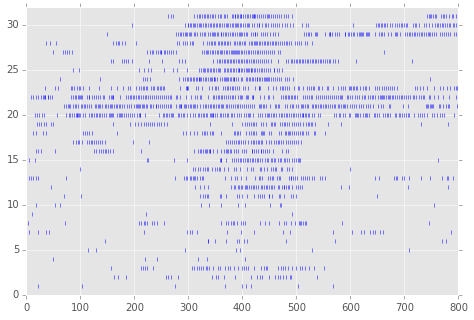

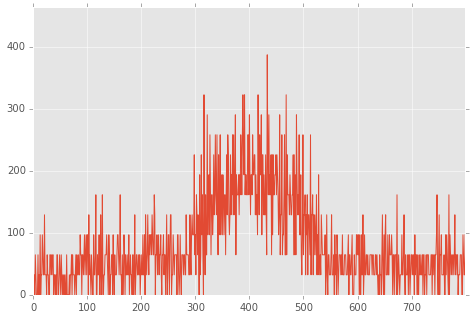

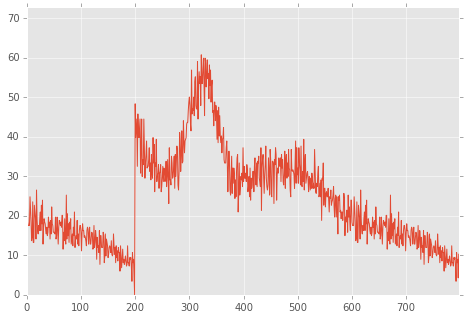

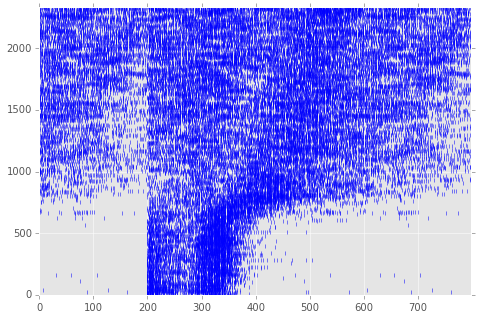

In [51]:
rec_name = 'ZKawakeM72_013_e_011'
r0=st_1.responses[rec_name]
rst = r0.make_raster(t_pre=200, t_post=600, warped=False)
plot_raster(rst, t0=0)
plot_raster(rst, bin_size=1, t0=0)
bl=r0.baseline.make_raster(t_pre=200, t_post=600, warped=False)
plot_raster(bl, bin_size=1, t0=0)
plot_raster(bl, t0=0)

#get the p values for the raster

In [2]:
a = np.arange(28).reshape((4,7))
print a

print col_binned(a, 4)


[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]]
[[  6.  15.]
 [ 34.  36.]
 [ 62.  57.]
 [ 90.  78.]]


In [15]:
cell_responses['ZKawakeM72_013_010'].responses[0].rec['meta']['u_id']

'ZKawakeM72_013_010'